In [32]:
'''
Name:Nikhil Mohite
Data science and business analytic internship(The Spark Foundtion)
Task 4: perform Exploratory Data Analysis on dataset 'Global Terroism'
'''
#Importing Libraries:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#loading dataset:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
file_path='/content/globalterrorism.csv'

In [9]:
df=pd.read_csv(file_path,encoding = "ISO-8859-1")

<ipython-input-9-db886eb77a62>:1: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path,encoding = "ISO-8859-1")


In [33]:
#OverView Of Dataset:
df.head().iloc[:,100:]

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [13]:
df.shape #shape of dataframe.

(84376, 135)

In [34]:
#Now We Do Data Pre-Processing..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84376 entries, 0 to 84375
Columns: 135 entries, eventid to related
dtypes: float64(71), int64(6), object(58)
memory usage: 86.9+ MB


Text(0.5, 1.0, 'Terrorist Attack per year')

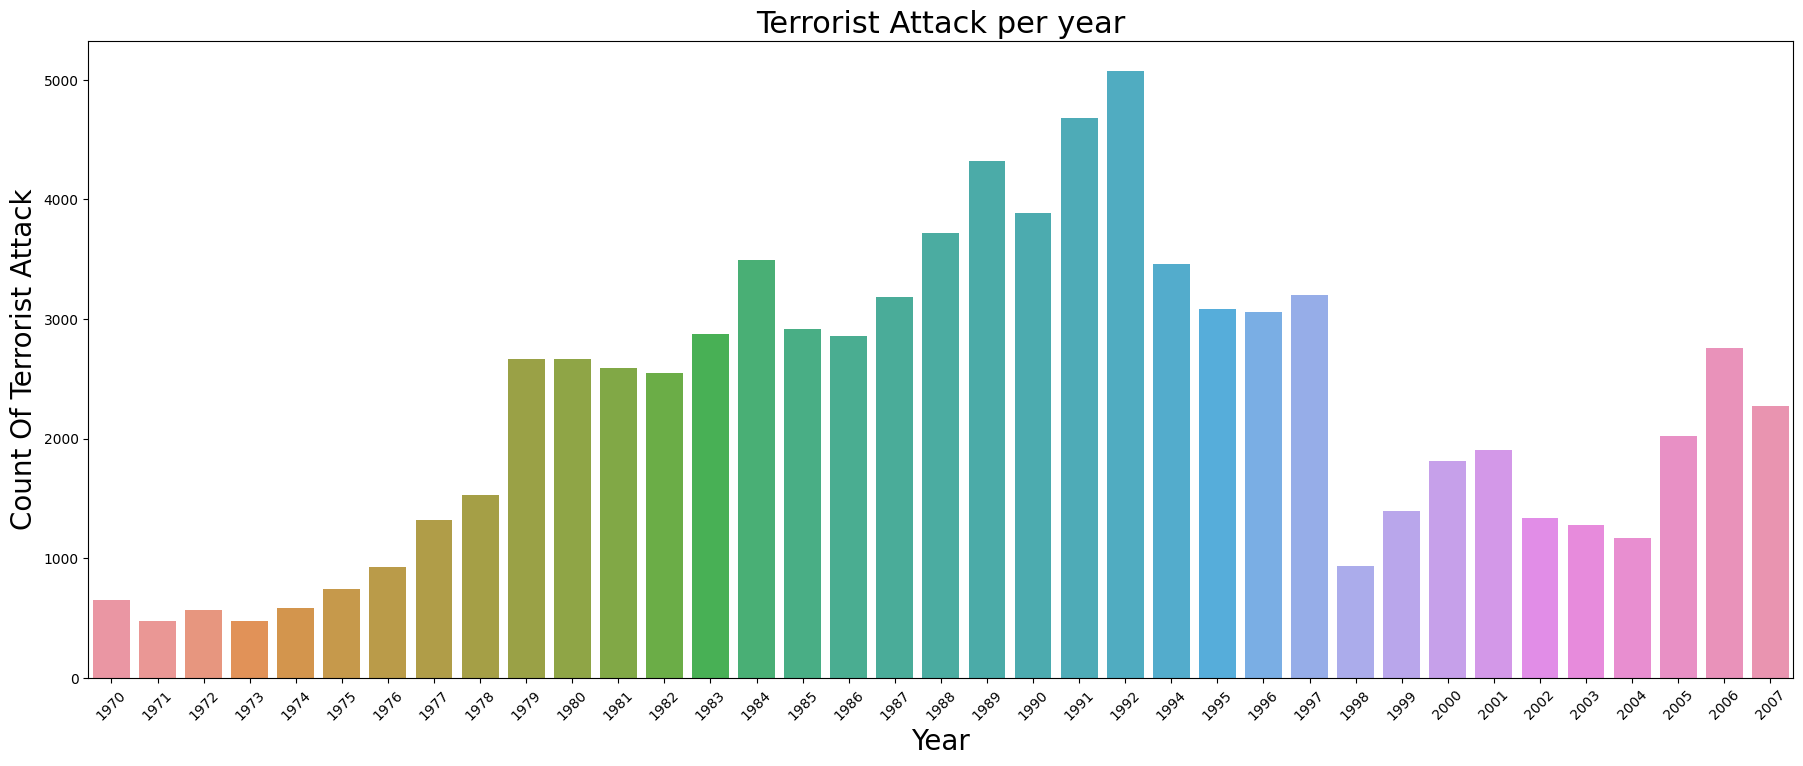

In [35]:
#Now we do Exploratory Data Analysis on this dataset..
#This graph shows terrorist attack per year..
attack_per_year=df['iyear'].value_counts()
ax=plt.rcParams['figure.figsize']=22,8.27
ax=sns.countplot(x='iyear',data=df)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation=45)
ax.set_ylabel('Count Of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack per year',fontsize=22)


Text(0.5, 1.0, ' Top 30 Country via numbers of Attacks')

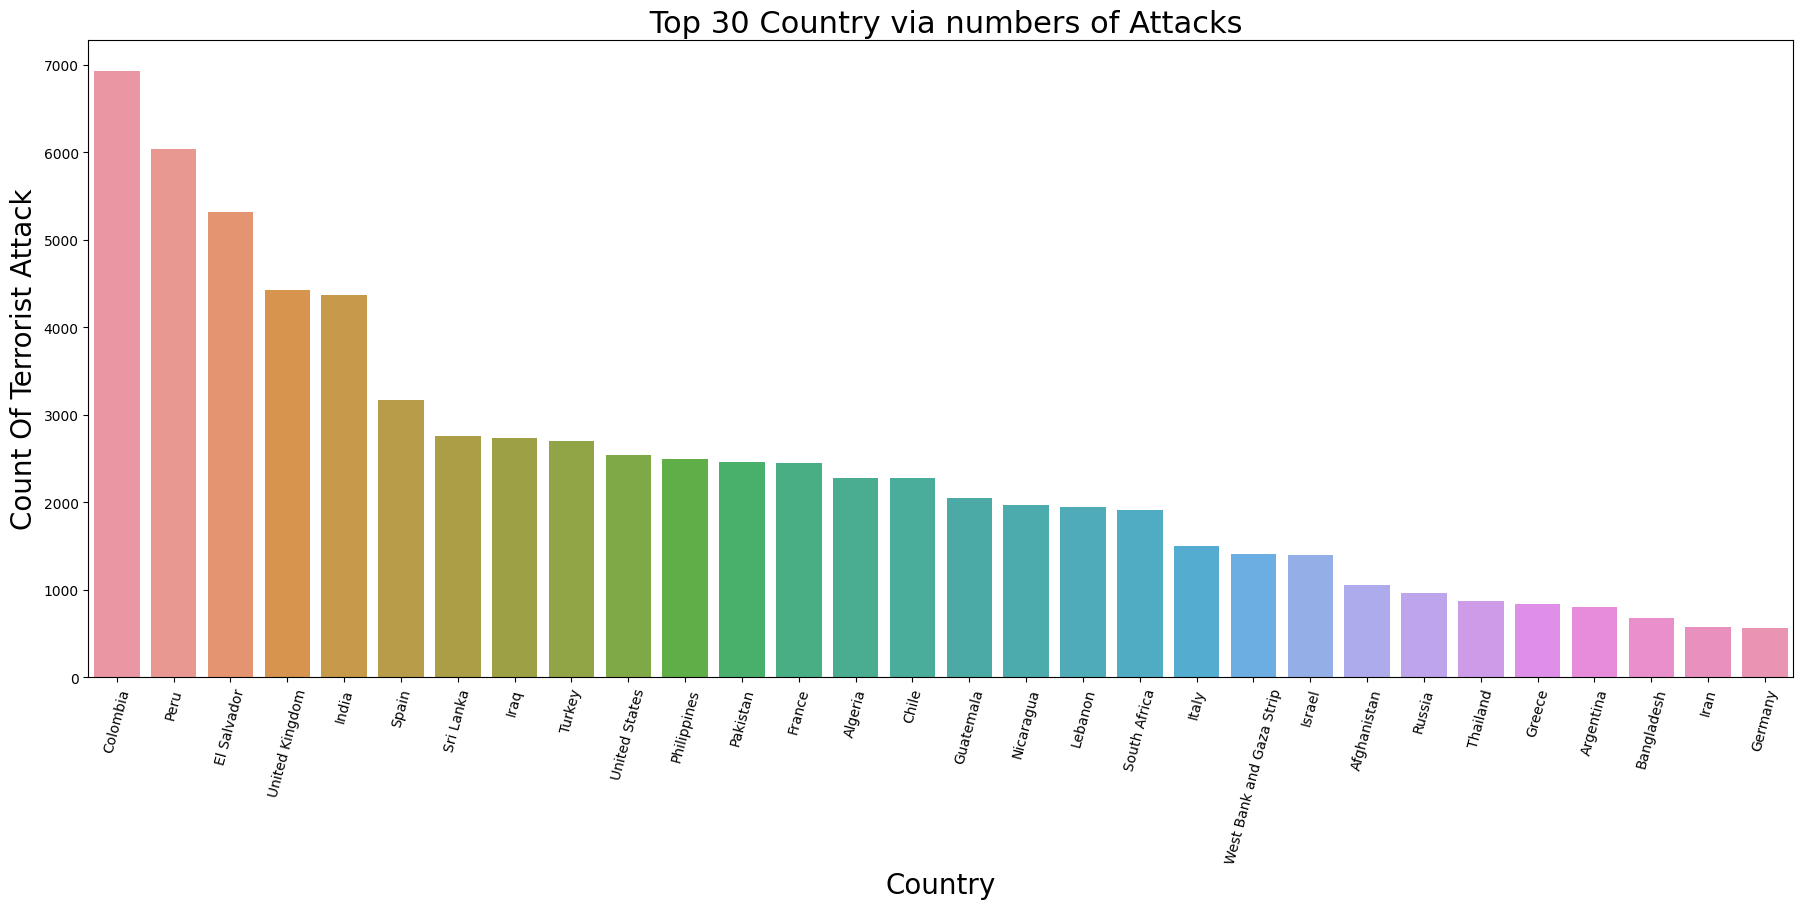

In [36]:
#This graph shows top 30 country via numbers of attacks..
ax=plt.rcParams['figure.figsize']=22,8.27
ax=sns.countplot(x='country_txt',data=df,order=df['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation=75)
ax.set_ylabel('Count Of Terrorist Attack',fontsize=20)
ax.set_title(' Top 30 Country via numbers of Attacks',fontsize=22)


Text(0.5, 1.0, 'region via numbers of attacks')

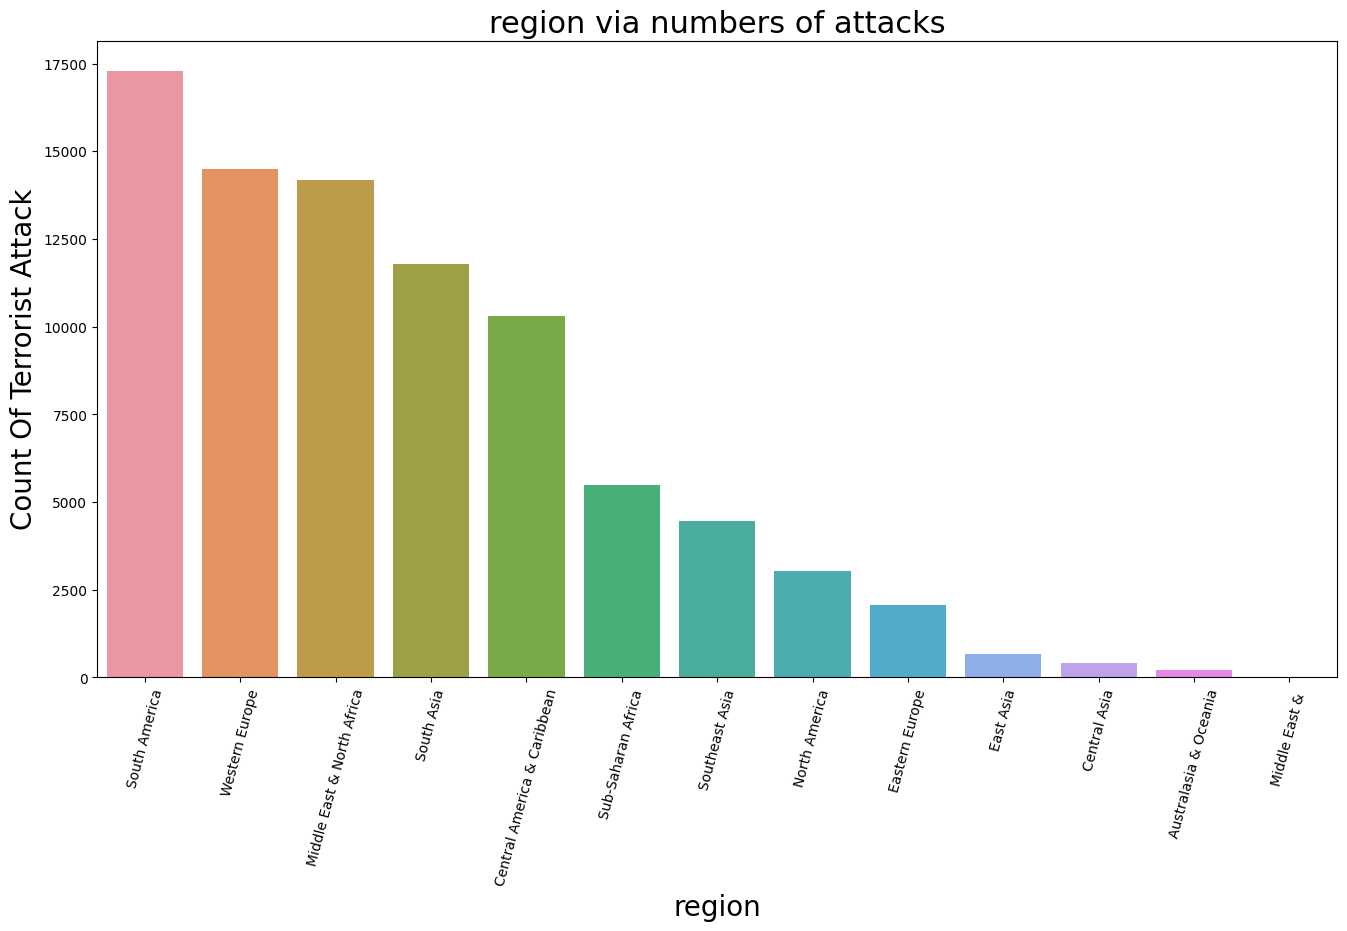

In [37]:
#This graph shows region via number of attacks..
ax=plt.rcParams['figure.figsize']=16,8.27
ax=sns.countplot(x='region_txt',data=df,order=df['region_txt'].value_counts().index)
ax.set_xlabel('region',fontsize=20)
plt.xticks(rotation=75)
ax.set_ylabel('Count Of Terrorist Attack',fontsize=20)
ax.set_title('region via numbers of attacks',fontsize=22)


Text(0.5, 1.0, 'freuent used weapon in attack')

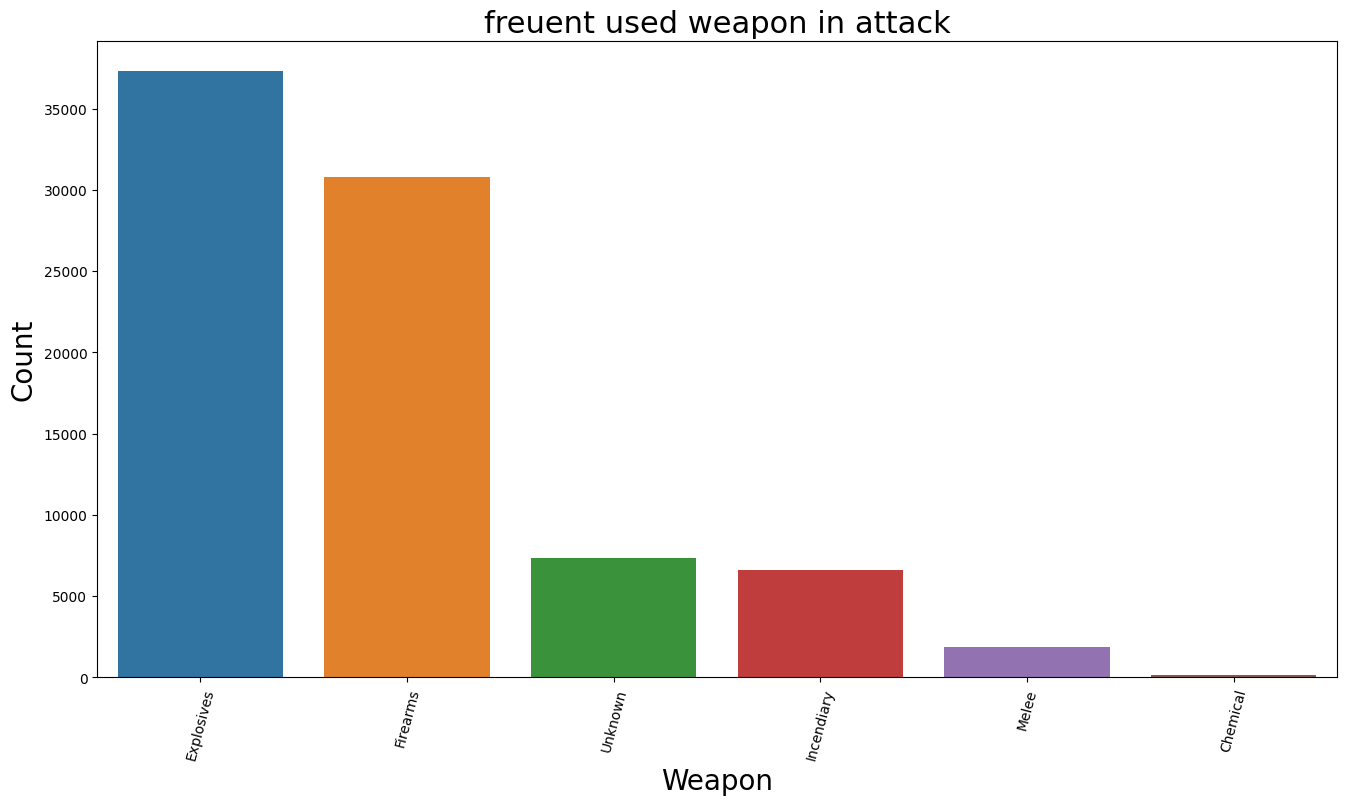

In [38]:
#This graph shows Most Frequnet Used Weapon in attacks..
ax=plt.rcParams['figure.figsize']=16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df,order=df['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=20)
plt.xticks(rotation=75)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('freuent used weapon in attack',fontsize=22)


Text(0.5, 1.0, 'Most Frequent Type of attacks')

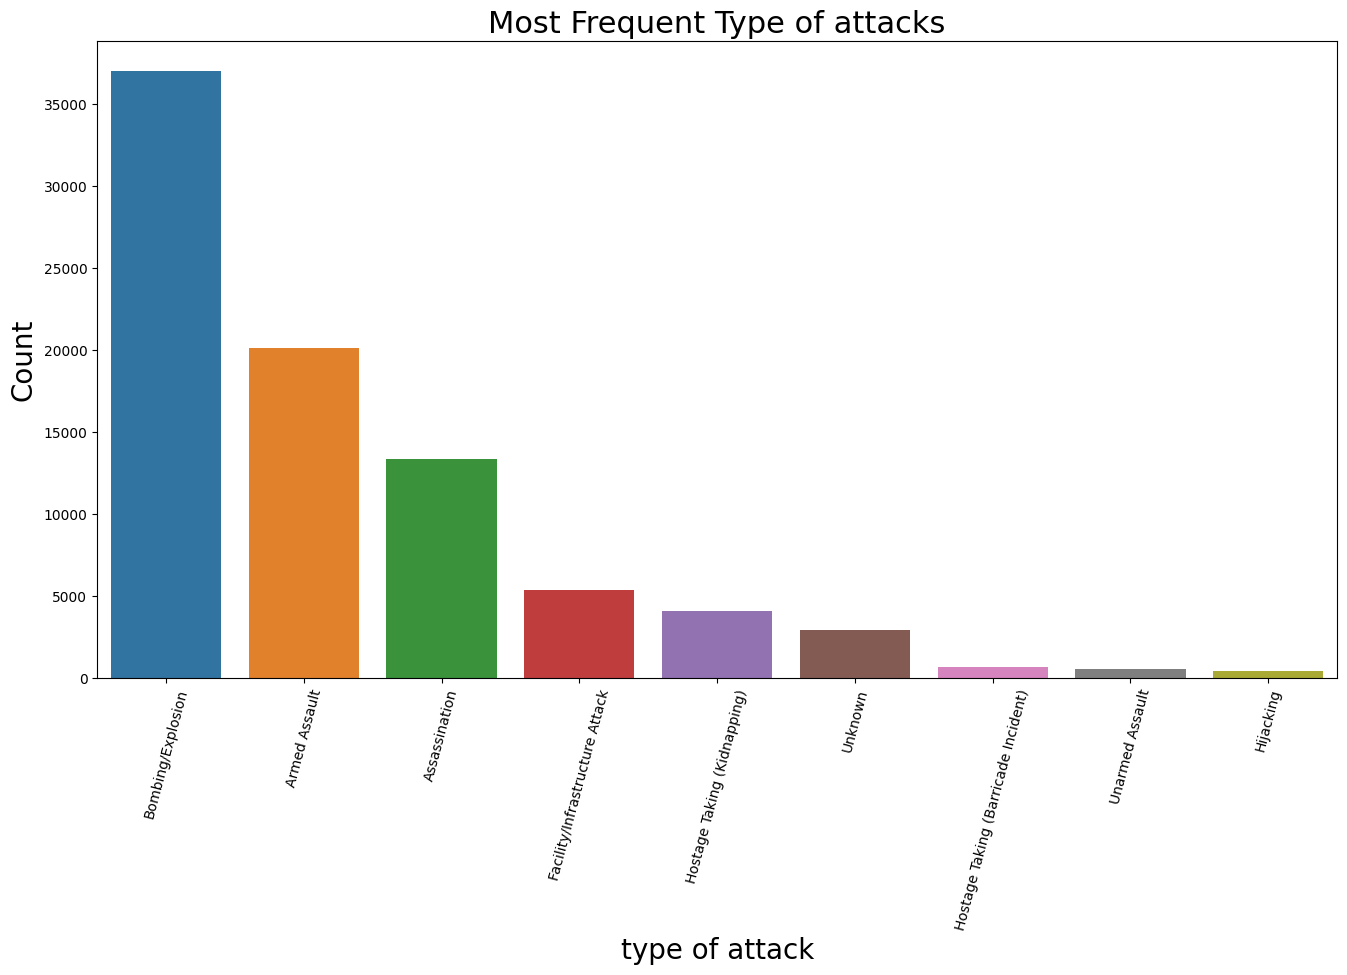

In [39]:
#This graph shows most frequent type of attacks..
ax=plt.rcParams['figure.figsize']=16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df,order=df['attacktype1_txt'].value_counts().index)
ax.set_xlabel('type of attack',fontsize=20)
plt.xticks(rotation=75)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('Most Frequent Type of attacks',fontsize=22)


Text(0.5, 1.0, 'frequent taregt of terrorist')

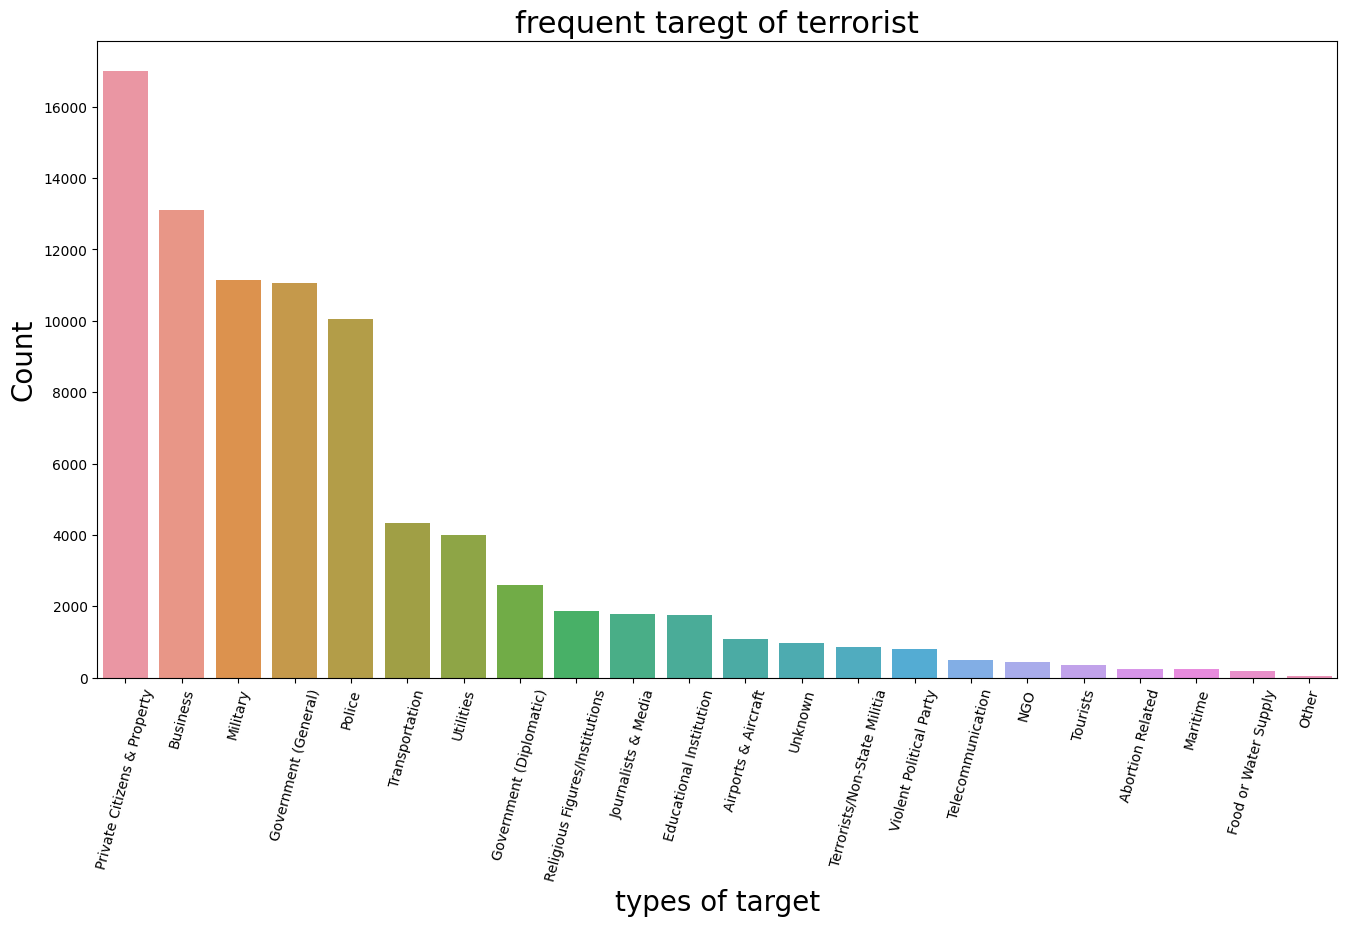

In [40]:
#This graph shows Most Frequent Target Of Terrorist
ax=plt.rcParams['figure.figsize']=16,8.27
ax=sns.countplot(x='targtype1_txt',data=df,order=df['targtype1_txt'].value_counts().index)
ax.set_xlabel('types of target',fontsize=20)
plt.xticks(rotation=75)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('frequent taregt of terrorist',fontsize=22)


Text(0.5, 1.0, 'numbers of attacks')

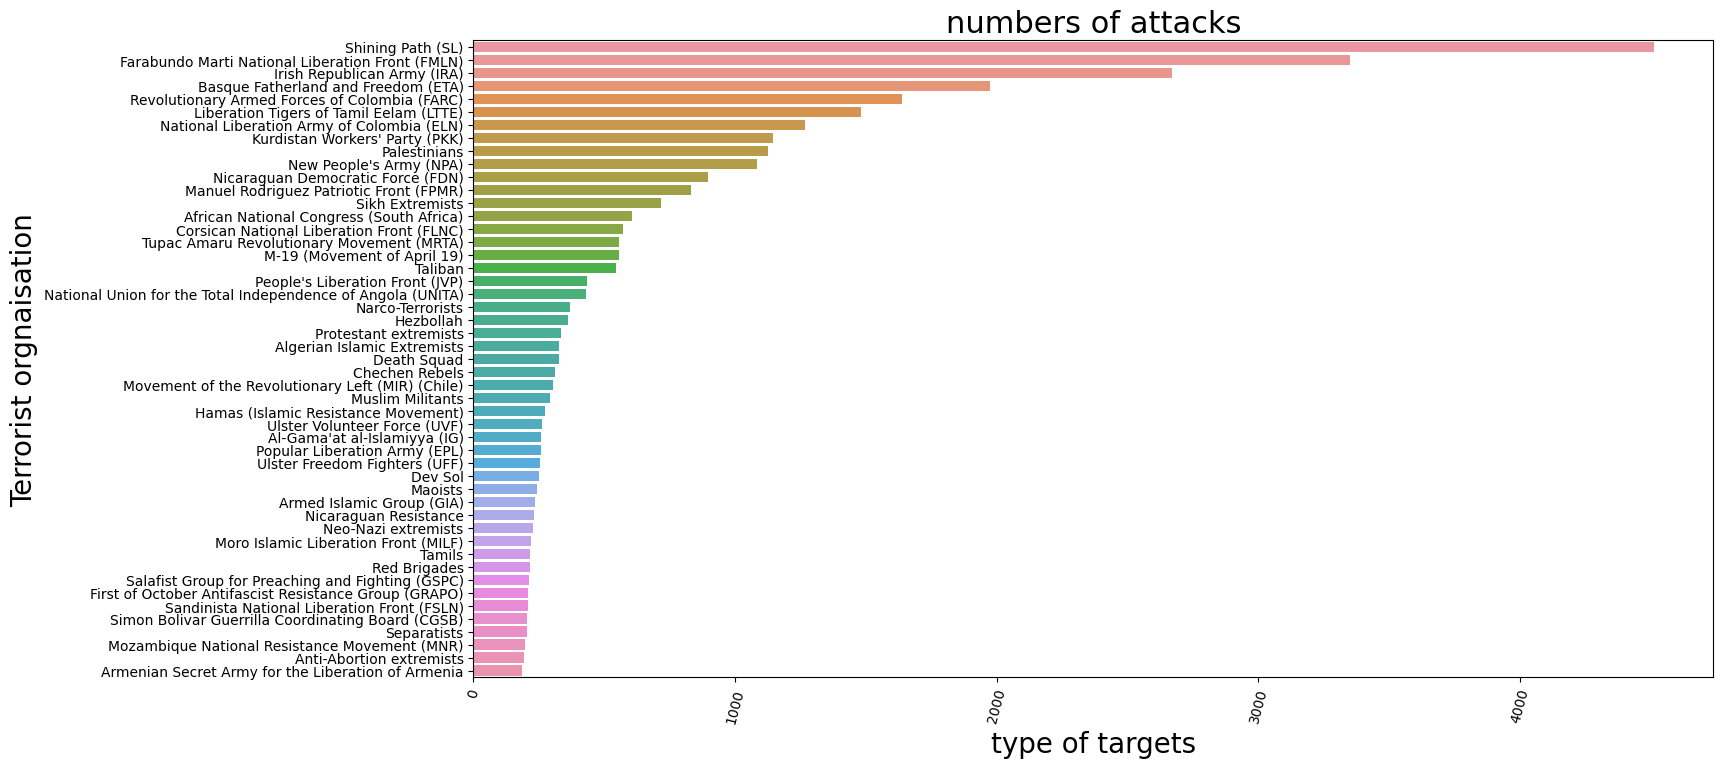

In [41]:
#This graph shows number of attacks and terroist organisation..
ax=plt.rcParams['figure.figsize']=16,8.27
ax=sns.countplot(y='gname',data=df,order=df['gname'].value_counts().index[1:50])
ax.set_xlabel('type of targets',fontsize=20)
plt.xticks(rotation=75)
ax.set_ylabel('Terrorist orgnaisation',fontsize=20)
ax.set_title('numbers of attacks',fontsize=22)


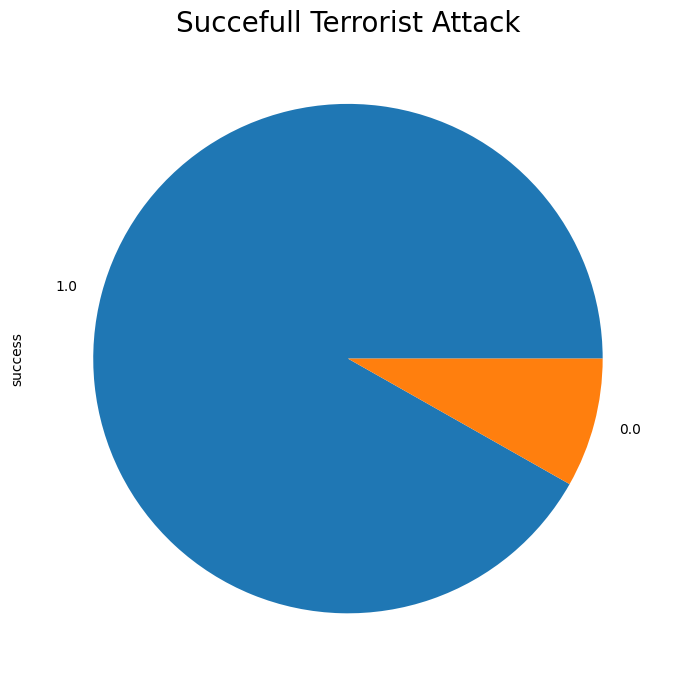

In [42]:
#This pie chart shows sucessfull terrorist attack..
ax=df['success'].value_counts().plot(kind='pie')
ax.set_title('Succefull Terrorist Attack',fontsize=20);

In [31]:
'''
Result of analysis:
1.Most of the attacks were through either Bombing or Explosion..
2.Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
3.The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.
'''

'\nResult of analysis:\n1.Most of the attacks were through either Bombing or Explosion..\n2.Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.\n3.The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.\n'